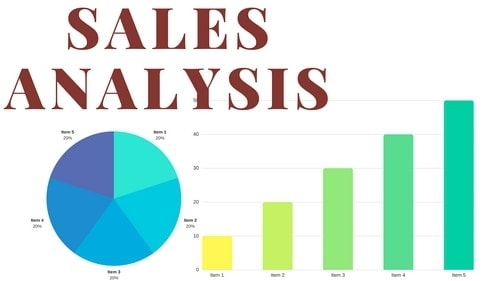

In [105]:
#sales data analysis image
from IPython.display import Image
Image('/content/Sales-Analysis-image.jpg')

##***SALES DATA ANALYSIS***
-project 1 on sale dataset to analysis the data.
#Goal:-

Use sales data analysis to find patterns, best-selling items, and revenue indicators to help in business decision-
making.

This project will require you to delve into a sizable sales dataset in order to glean insightful information.\ In order
to successfully convey your findings, you will compute revenue measures like
1. total sales,
2. analyze sales trends over time,
3. determine the best-selling products, and build visualizations.\
This assignment demonstrates your capacity to work with and extract knowledge from huge datasets,\
empowering you to provide data-driven suggestions for improving sales tactics.

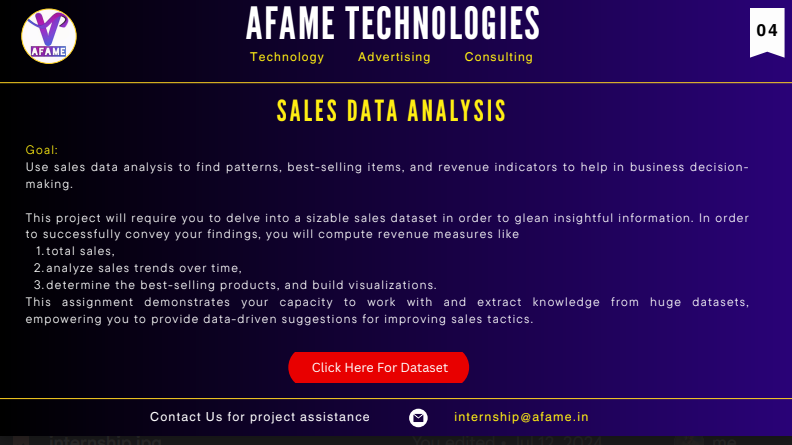

In [106]:
#All activity as per project by AFAME TECHNOLGIES
from IPython.display import Image
Image('/content/Sales_data_activity _list.png')

#import all required modules

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

##***Load the Dataset on Sale***
-load dataset from google drive link given by AFAME TECHNOLOGIES

In [108]:
df = pd.read_excel('/content/ECOMM DATA.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


##DATA DESCRIPTION:-
-To analysis the whole dataset

In [109]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [110]:
df.info() #check the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

### ***Exploratory Data Analysis (EDA)***

##Handling the missing value(null/NAN):-
-postal code is nearly empty or filled with null drop it

In [111]:
#check the missing value in every columns
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

##***Data Cleaning***

In [112]:
#drop the postal code from data
df.drop('Postal Code',axis=1,inplace=True)

In [113]:
#Again check out the data drop or not droped and check the null value
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [114]:
# Display the summary of the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

##Remove Duplicates:
-if any duplicate

In [115]:
#Remove Duplicates: Check and remove duplicate records if any.
df.duplicated().sum()

0

In [116]:
#check the duplicated row if any then drop
df['Row ID'].duplicated().sum()

0

In [117]:
#check the duplicated order_id
df['Order ID'].duplicated().sum()
#we can't drop it because same order_id can repeat because of multiple iteams orders in single order id

26255

In [118]:
#check the shape of data after cleaning
df.shape

(51290, 23)

In [119]:
#check the columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

##1.***total sales***
- As Total Sale ask by project activities

In [120]:
# 1. Compute total sales in indian rupees
total_sales = df['Sales'].sum()
print(f'Total Sales: ${total_sales:,.2f}')

Total Sales: $12,642,501.91


#Which are the most selling products?
- most saling product in term of Quantity in top 10 list

In [121]:
boughts = df.groupby('Product Name').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
boughts

,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


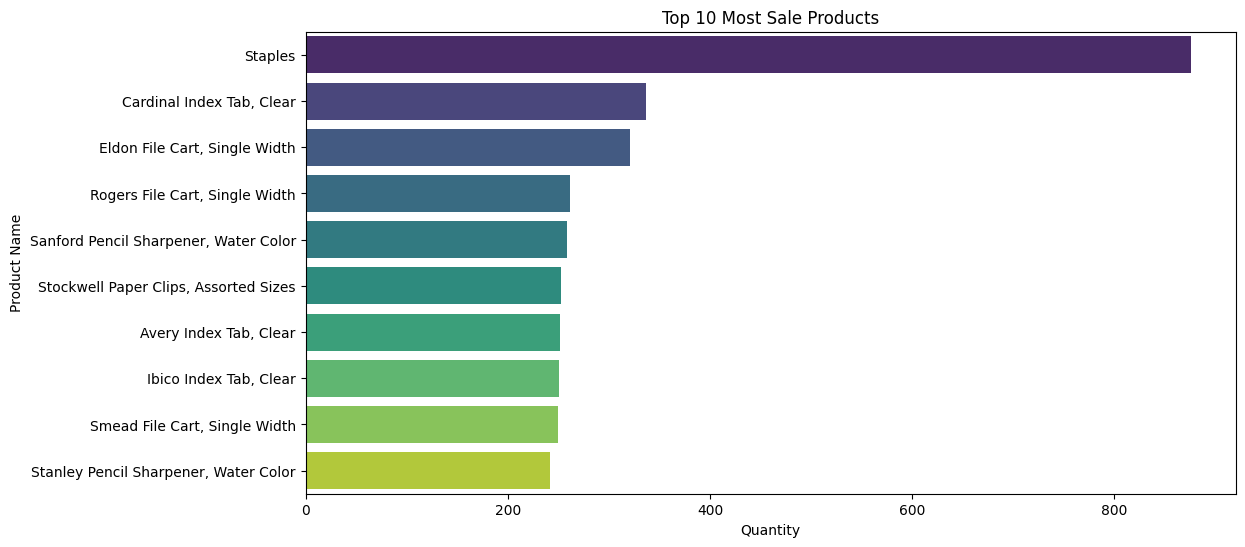

In [122]:
#represent in bar chart top 10 list
# Plot the top 10 most bought products
plt.figure(figsize=(12, 6))
sns.barplot(x=boughts['Quantity'], y=boughts.index, palette='viridis')
plt.title('Top 10 Most Sale Products')
plt.xlabel('Quantity')
plt.ylabel('Product Name')
plt.show()

##which category items sale maximum in bar chart

In [123]:
# Find unique items in 'Category' column
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

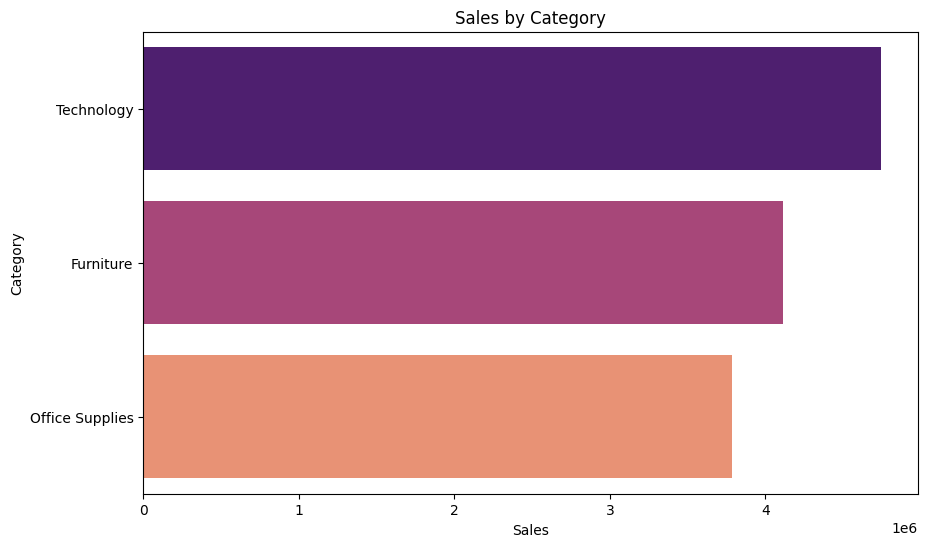

In [124]:
# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='magma')
plt.title('Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

##***Most profitable Category***

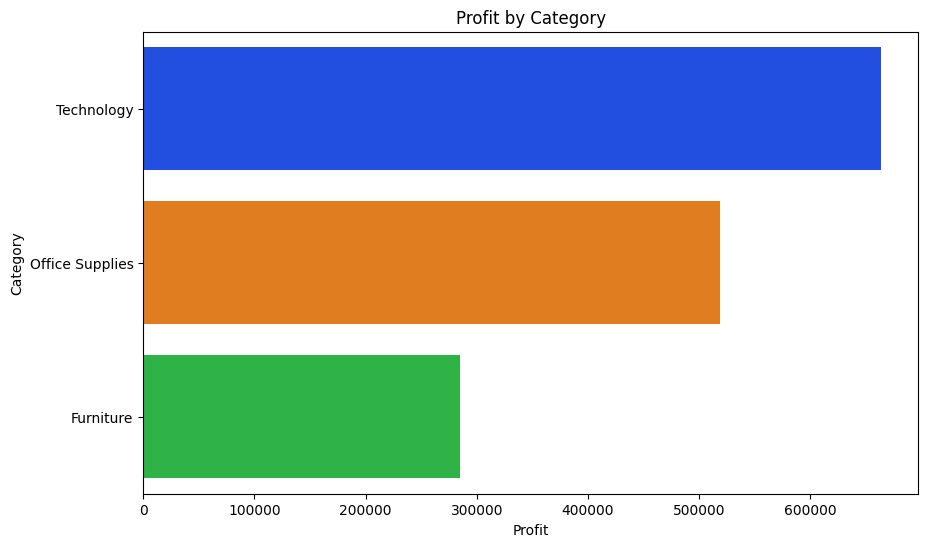

In [125]:
#profit by Category
category_Profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_Profit.values, y=category_Profit.index, palette='bright')
plt.title('Profit by Category')
plt.xlabel('Profit')
plt.ylabel('Category')
plt.show()

## Product Analysis(best saling product) top 10 list

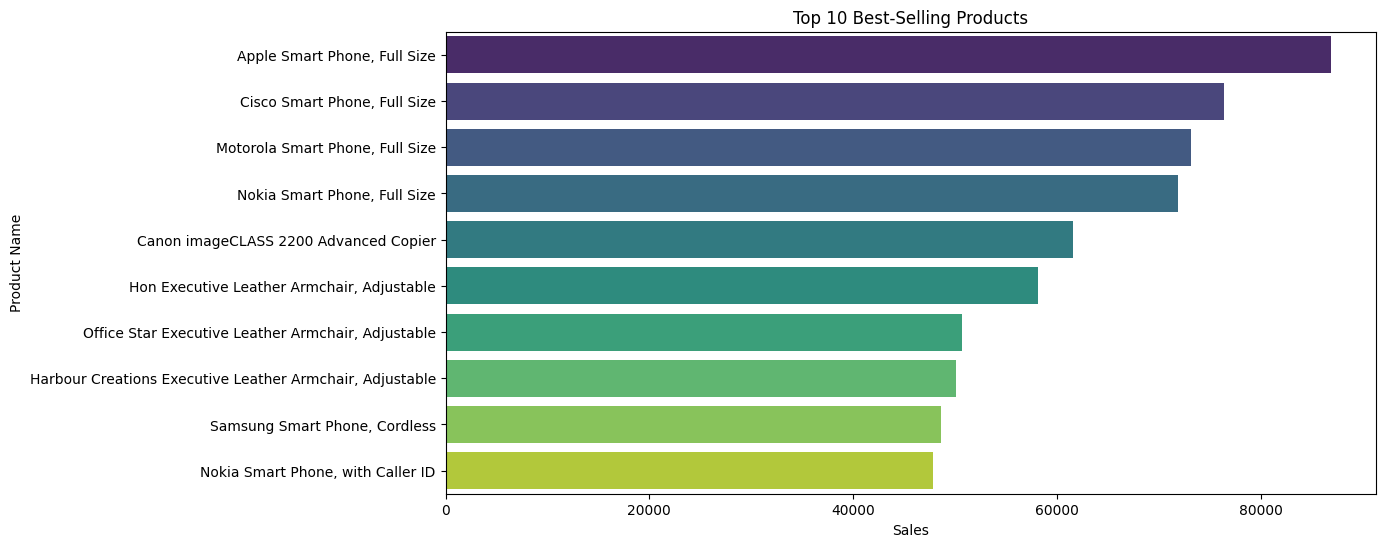

In [126]:
# Best-selling products
best_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=best_selling_products.values, y=best_selling_products.index, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

##Customer Analysis(find top 10 customer list)
- in term of sales

In [127]:
#number 1 customer in terms of sales
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(1)

Customer Name
Tom Ashbrook    40488.0708
Name: Sales, dtype: float64

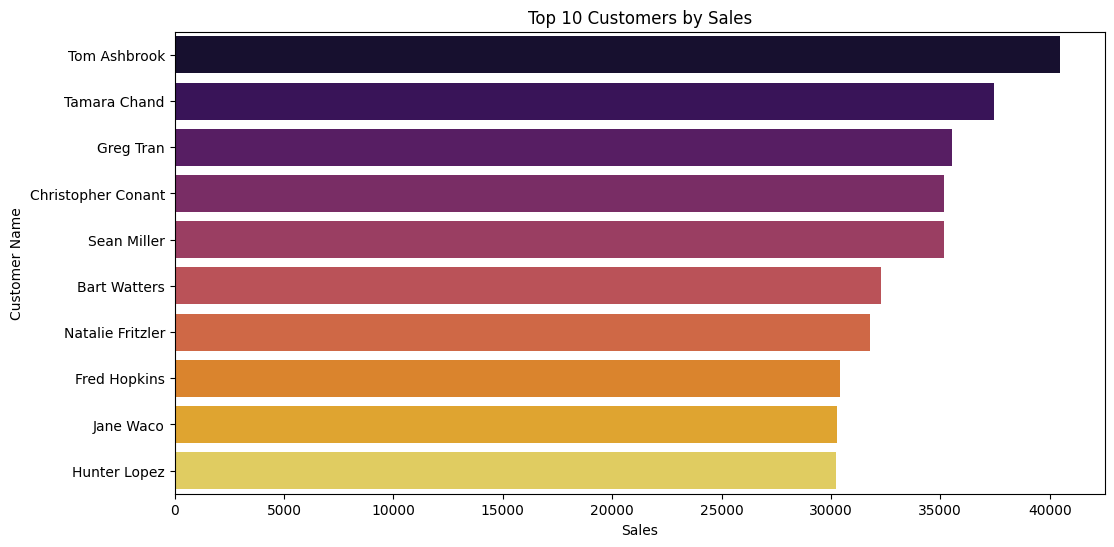

In [128]:
# Top 10 customers list on highest sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='inferno')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.show()

##***Top 10 Customer highest profit generated for comapany***

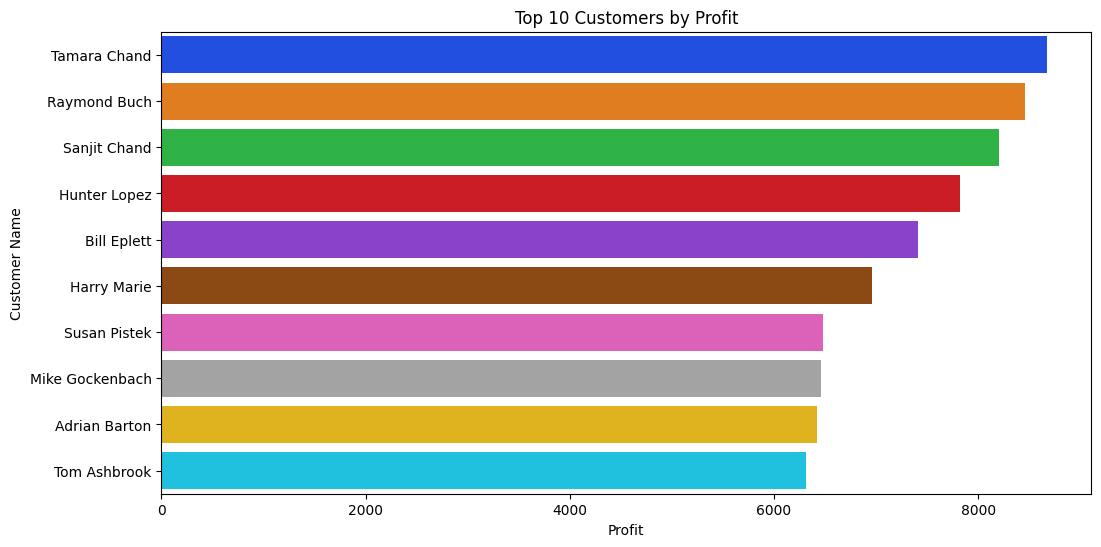

In [129]:
# Top 10 customers list on highest sales
top_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='bright')
plt.title('Top 10 Customers by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer Name')
plt.show()

## ***Geographical Analysis***
-which region has highest sales

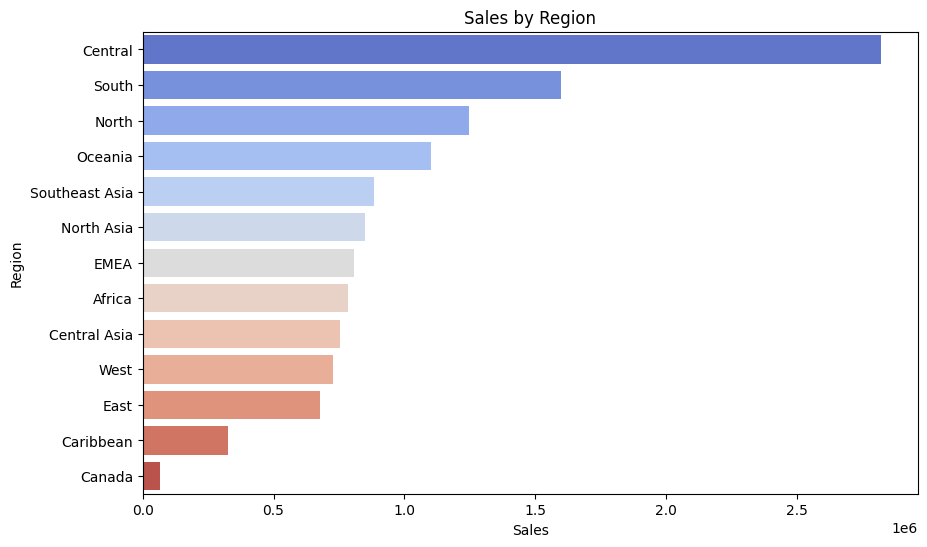

In [130]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.values, y=region_sales.index, palette='coolwarm')
plt.title('Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

## Trend sale Analysis(trend of sale over the time )

In [131]:
#unique year in this dataset then we will check trend over the year and every year month trends
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Year'].unique()

array([2012, 2013, 2011, 2014], dtype=int32)

In [132]:
# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

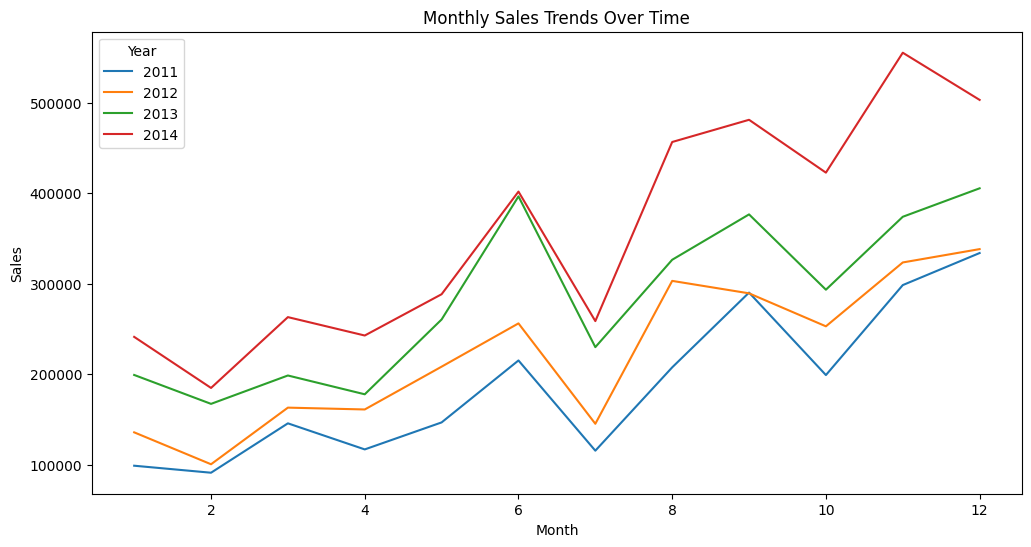

In [133]:
# Group by year and month to calculate monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', palette='tab10')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

##***Trend line in year 2014 month wise***
- There are increase and decease order of sale that tends to be trends.

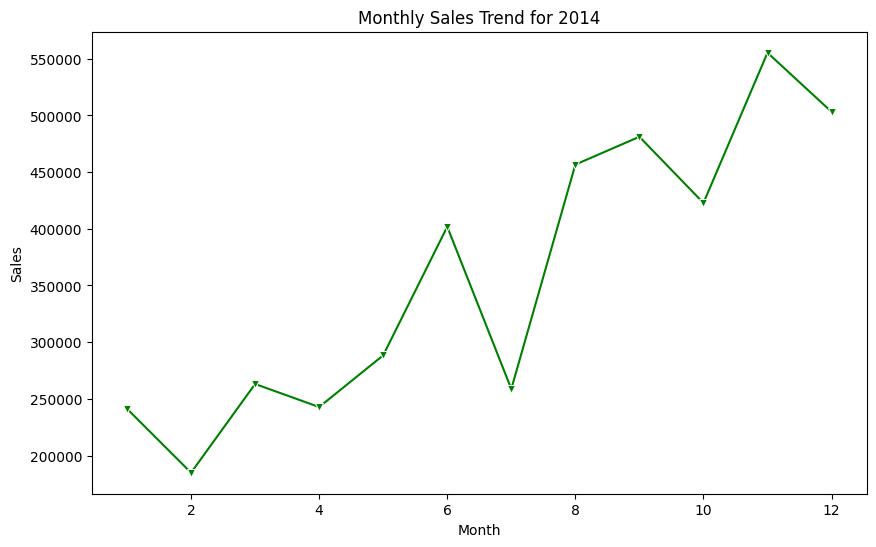

In [134]:
# Monthly sales trend for a specific year 2014
monthly_sales_2014 = df[df['Year'] == 2014].groupby(df['Month'])['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales_2014.index, y=monthly_sales_2014.values, marker='v', color='green')
plt.title('Monthly Sales Trend for 2014')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

##***which month has highest sales over all the years***

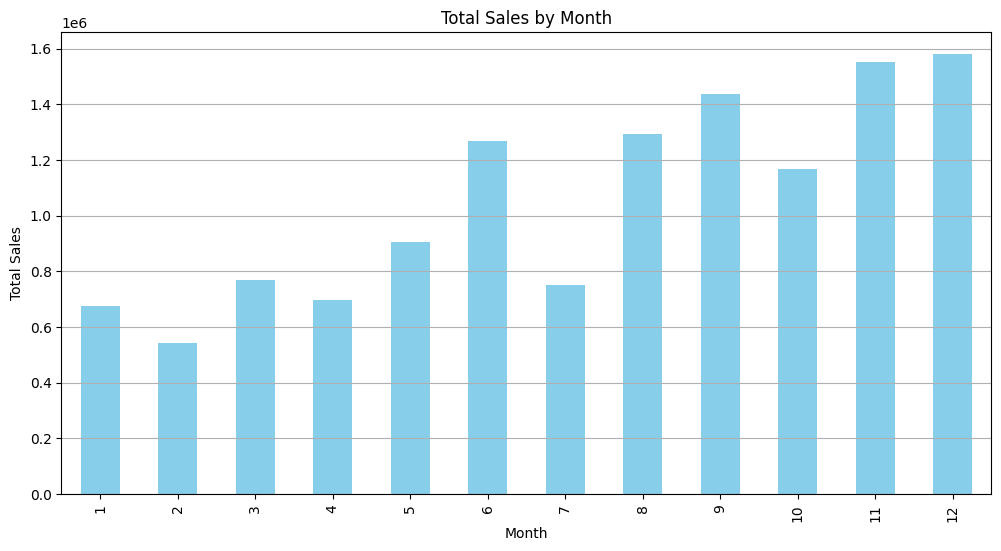

In [162]:
# Group by month and sum sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

## ***Discount and sale Analysis***
-As per chart discount reduce the sales
- more discount can reduce the profit size

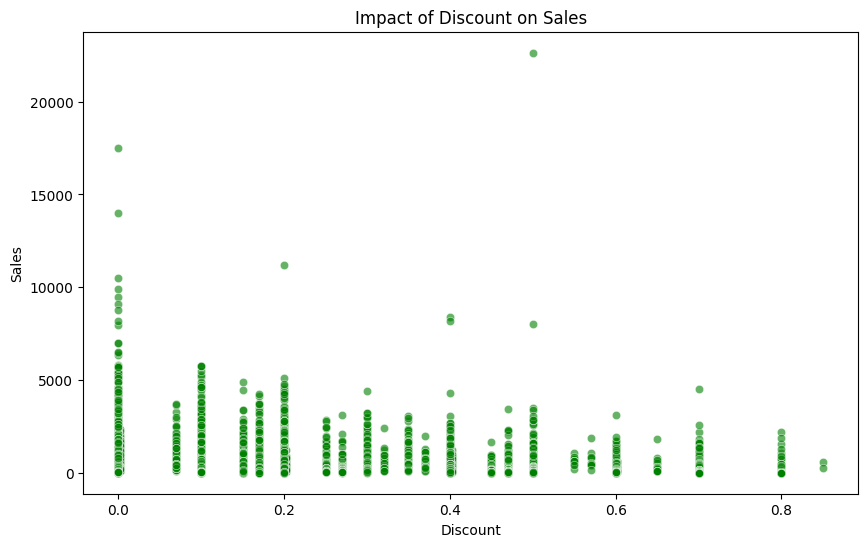

In [135]:
# Impact of discount on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=df, alpha=0.6, color='green')
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

##Discount that affect on profit
-More discount that will lead to less profit(loss) as per charts

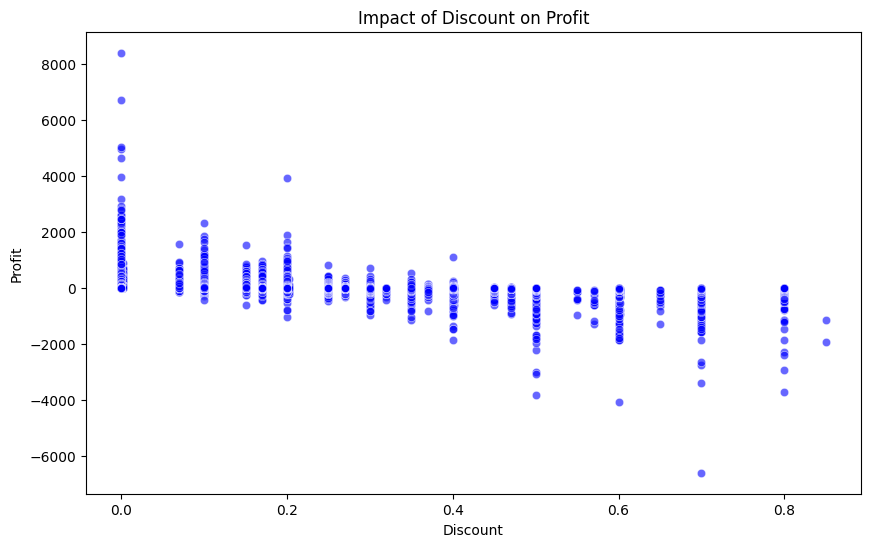

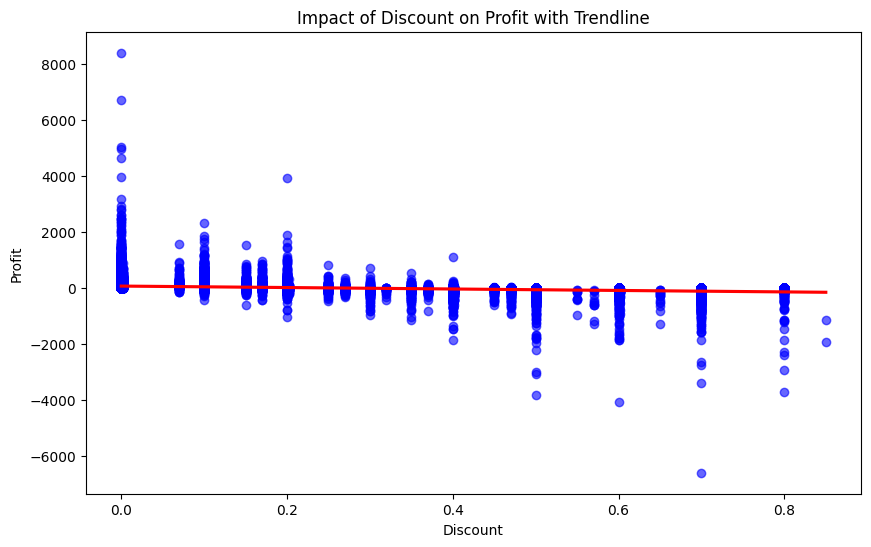

In [136]:
# Scatter plot of Discount vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6, color='blue')
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Add a trendline to the scatter plot for better visualization
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'alpha':0.6, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Impact of Discount on Profit with Trendline')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

##***Find out most profitable product***

In [137]:
# Group by 'Product Name' and sum the 'Profit' for each product
profitable_products = df.groupby('Product Name')['Profit'].sum()
profitable_products.sort_values(ascending=False, inplace=True)

# Display the top 10 most profitable products
print("Top 10 Most Profitable Products:-")
top_10_profitable_products=profitable_products.head(10)
top_10_profitable_products

Top 10 Most Profitable Products:-


Product Name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: Profit, dtype: float64

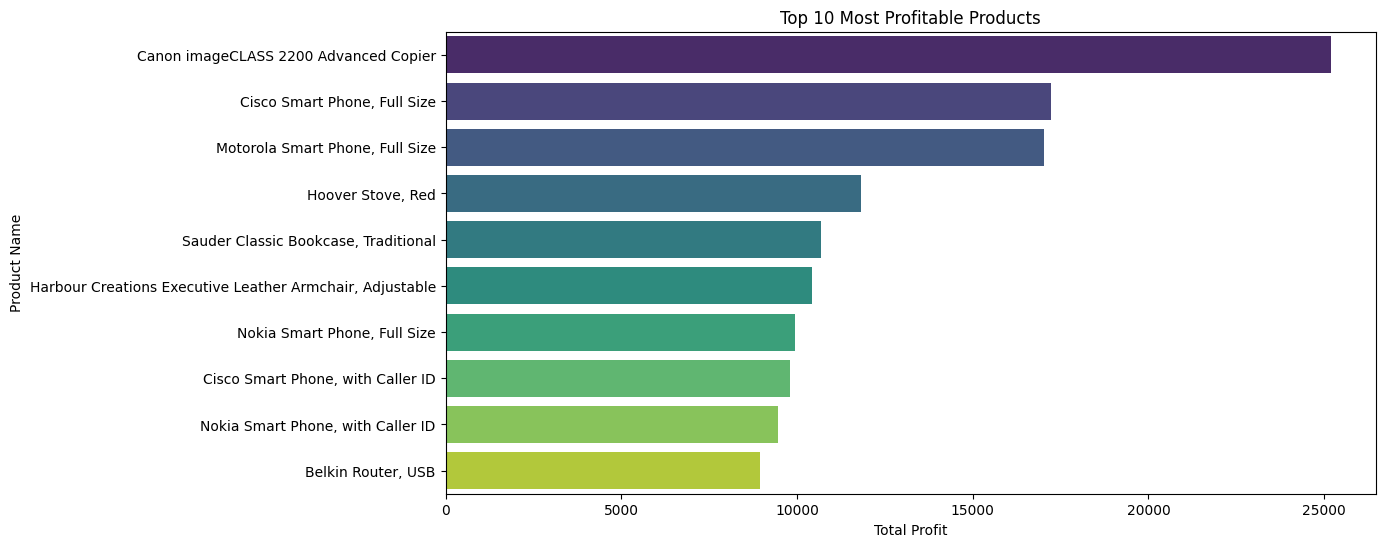

In [138]:
# Plot bar chart of the top 10 most profitable products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_profitable_products.values, y=top_10_profitable_products.index, palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

##***Shiping cost by Ship mode***
-Same day delivery has highest shipping cost

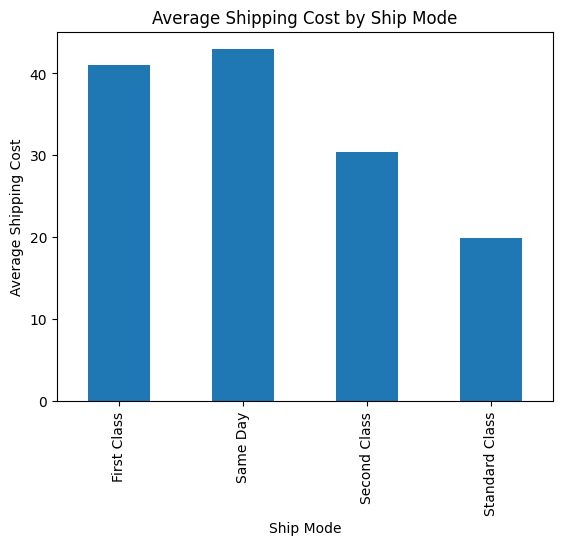

In [158]:
# Analyze the average shipping cost by ship mode
shipping_costs = df.groupby('Ship Mode')['Shipping Cost'].mean()

# Plotting
shipping_costs.plot(kind='bar', title='Average Shipping Cost by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipping Cost')
plt.show()

##***Most sale product name***

In [139]:
# Group by 'Product Name' and sum the 'Sales' for each product
most_Sales_products = df.groupby('Product Name')['Sales'].sum()
most_Sales_products.sort_values(ascending=False, inplace=True)

# Display the top 10 most profitable products
top_10_sales_products=most_Sales_products.head(10)

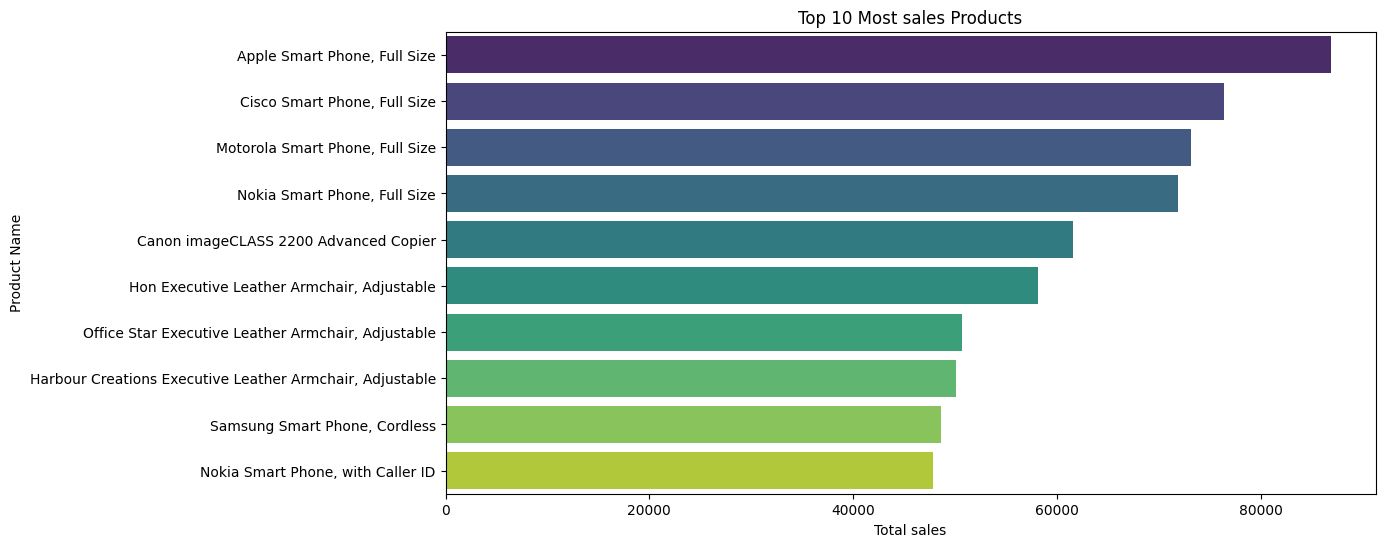

In [140]:
# Plot bar chart of the top 10 most sale products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sales_products.values, y=top_10_sales_products.index, palette='viridis')
plt.title('Top 10 Most sales Products')
plt.xlabel('Total sales')
plt.ylabel('Product Name')
plt.show()

##Most Profitable customer segment

In [141]:
#unique type of customer segment
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

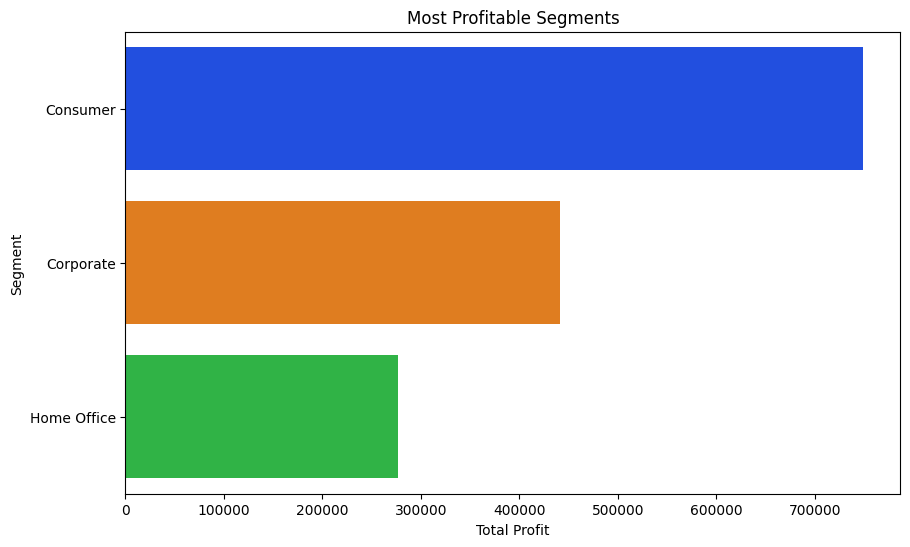

In [142]:
# Group by 'Segment' and sum the 'Profit' for each segment
profit_per_segment = df.groupby('Segment')['Profit'].sum()
# Plot bar chart of the most profitable segments
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_per_segment.values, y=profit_per_segment.index, palette='bright')
plt.title('Most Profitable Segments')
plt.xlabel('Total Profit')
plt.ylabel('Segment')
plt.show()

##***Top 10 country has most sales***

In [143]:
# Group by 'Country' and sum the 'Sales' for each country
sales_per_country = df.groupby('Country')['Sales'].sum()

# Sort the countries by 'Sales' in descending order
sales_per_country.sort_values(ascending=False, inplace=True)

# Get the top 10 countries with the most sales
top10_country_sale=sales_per_country.head(10)

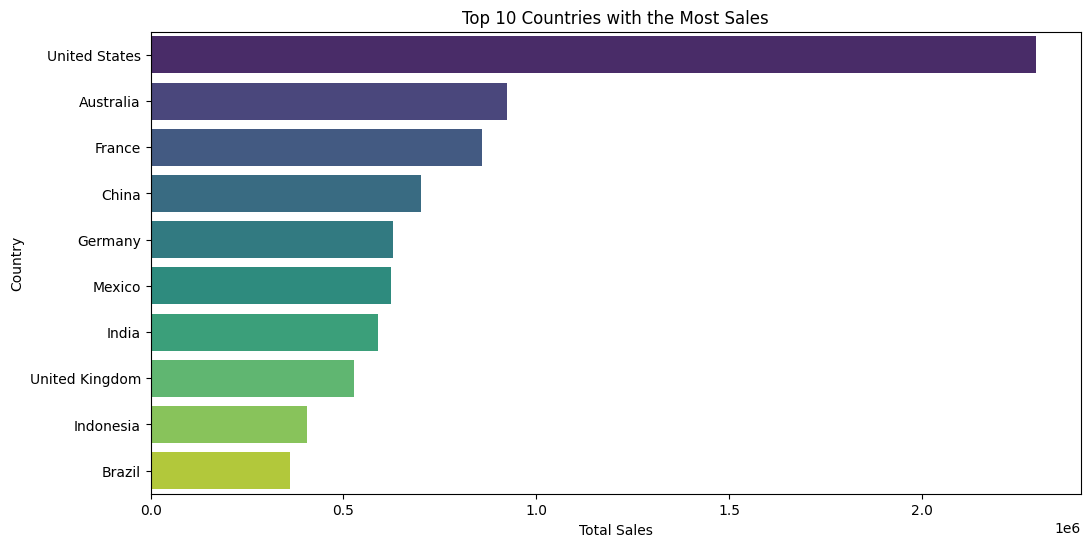

In [144]:
# Plot bar chart of the top 10 countries with the most sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_country_sale.values, y=top10_country_sale.index, palette='viridis')
plt.title('Top 10 Countries with the Most Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

##Top 10 Country with highest profit in term of %
-in pie chart

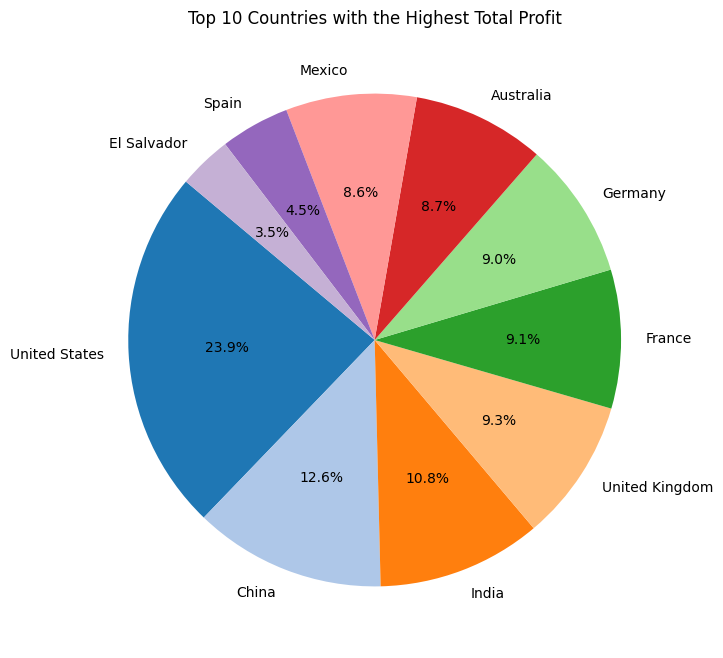

In [145]:
# Group by 'Country' and sum the 'Profit' for each country
country_profit = df.groupby('Country')['Profit'].sum()

# Sort the countries by 'Profit' in descending order
country_profit.sort_values(ascending=False, inplace=True)

# Get the top 10 countries with the highest total profit
top_10_countries_profit = country_profit.head(10)

# Plot pie chart of the top 10 countries with the highest total profit
plt.figure(figsize=(10, 8))
plt.pie(top_10_countries_profit, labels=top_10_countries_profit.index, autopct='%1.1f%%', startangle=140, colors=colors[:10])
plt.title('Top 10 Countries with the Highest Total Profit')
plt.show()

##which mode of shipping has higest sales:-

In [146]:
# Group by 'Ship Mode' and sum the 'Sales' for each mode
sales_per_ship_mode = df.groupby('Ship Mode')['Sales'].sum()
sales_per_ship_mode.sort_values(ascending=False, inplace=True) #descending order of sale in shipping mode
sales_per_ship_mode

Ship Mode
Standard Class    7.578652e+06
Second Class      2.565672e+06
First Class       1.830976e+06
Same Day          6.672020e+05
Name: Sales, dtype: float64

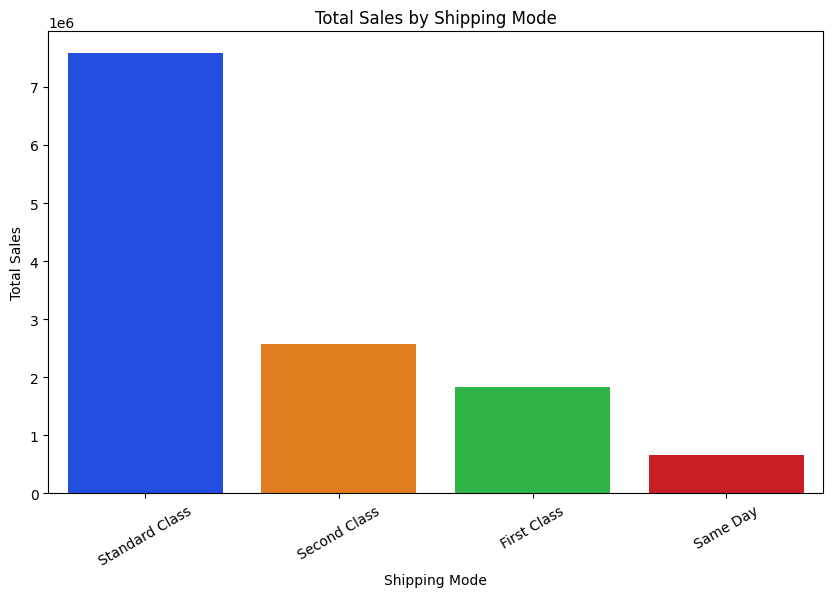

In [147]:
# Plot bar chart of sales by different shipping mode
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_per_ship_mode.index, y=sales_per_ship_mode.values, palette='bright')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.show()

#Which shipping mode has highest Average shipping cost

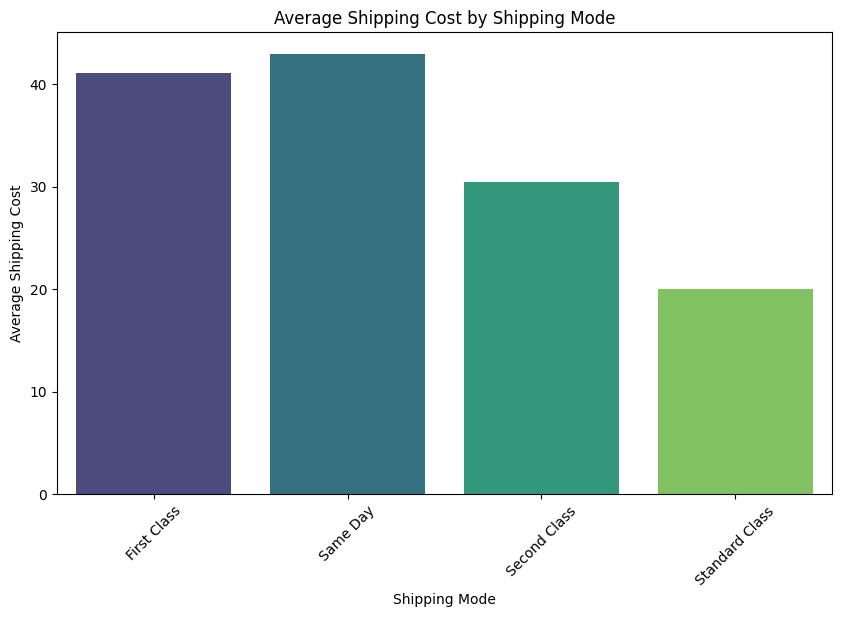

In [148]:
# Group by 'Ship Mode' and calculate the average 'Shipping Cost' for each mode
average_shipping_cost_per_mode = df.groupby('Ship Mode')['Shipping Cost'].mean()

# Plot bar chart of average shipping cost by shipping mode
plt.figure(figsize=(10, 6))
sns.barplot(x=average_shipping_cost_per_mode.index, y=average_shipping_cost_per_mode.values, palette='viridis')
plt.title('Average Shipping Cost by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Cost')
plt.xticks(rotation=45)
plt.show()

#Which Country has highest Average Shipping cost
-Represented by bar chart Taiwan has highest shipping cost

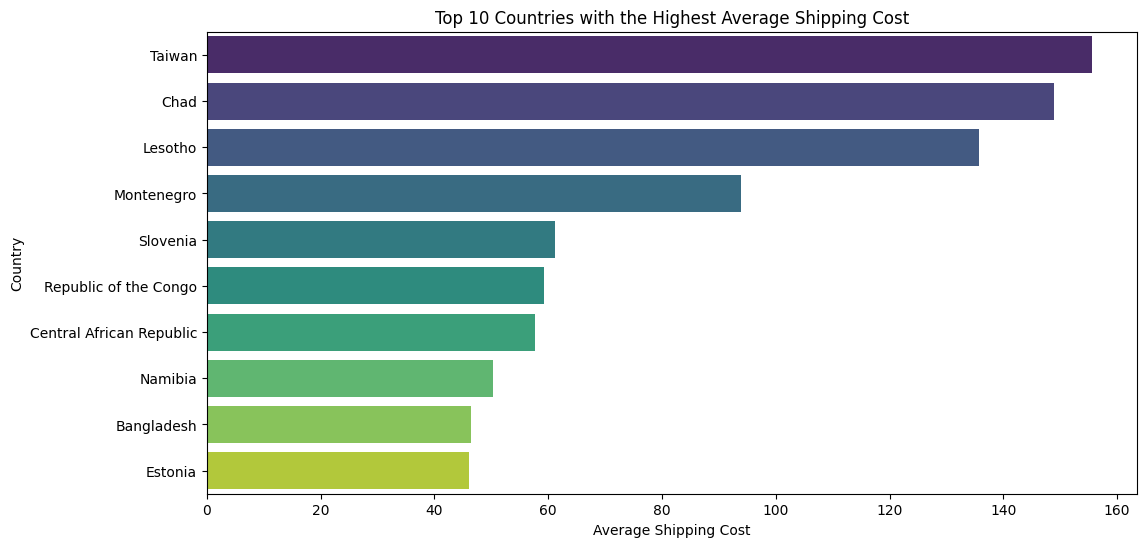

In [149]:
# Group by 'Country' and calculate the average 'Shipping Cost' for each country
average_shipping_cost_per_country = df.groupby('Country')['Shipping Cost'].mean()

# Sort the countries by average shipping cost in descending order
average_shipping_cost_per_country.sort_values(ascending=False, inplace=True)

# Get the top 10 countries with the highest average shipping cost
top_10_countries_shipping_cost = average_shipping_cost_per_country.head(10)

# Plot bar chart of the top 10 countries with the highest average shipping cost
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries_shipping_cost.values, y=top_10_countries_shipping_cost.index, palette='viridis')
plt.title('Top 10 Countries with the Highest Average Shipping Cost')
plt.xlabel('Average Shipping Cost')
plt.ylabel('Country')
plt.show()

##***which country has lowest shipping cost-***
-Equatorial Guinea has lowest shipping cost

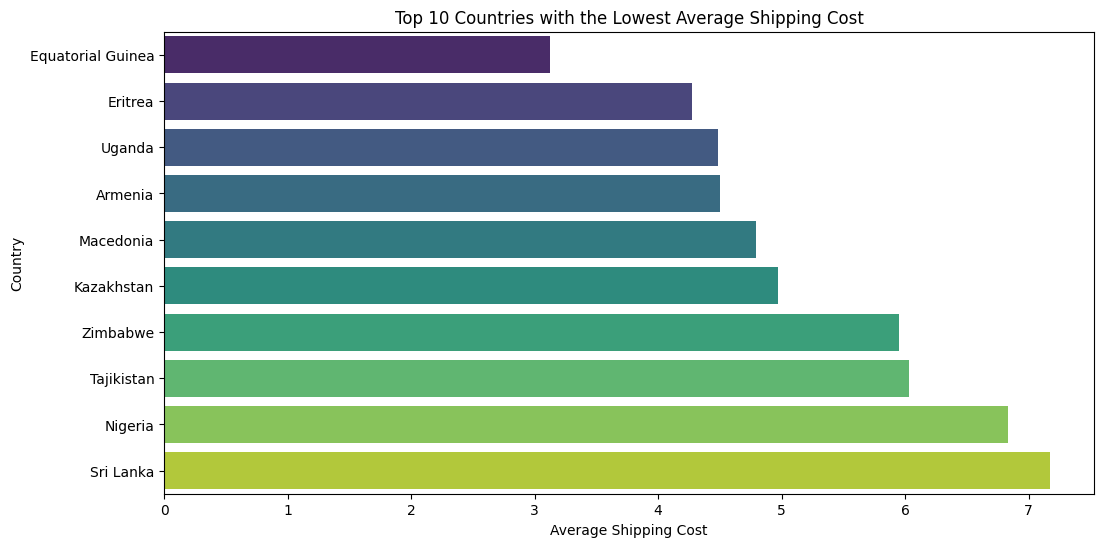

In [150]:
# Sort the countries by average shipping cost in descending order
average_shipping_cost_per_country.sort_values(ascending=True, inplace=True)

# Get the top 10 countries with the highest average shipping cost
top_10_countries_shipping_cost = average_shipping_cost_per_country.head(10)

# Plot bar chart of the top 10 countries with the Lowest average shipping cost
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries_shipping_cost.values, y=top_10_countries_shipping_cost.index, palette='viridis')
plt.title('Top 10 Countries with the Lowest Average Shipping Cost')
plt.xlabel('Average Shipping Cost')
plt.ylabel('Country')
plt.show()

##***which market has highest number of sale:-***
-it not about sum ototal sale ,it about number of sale has highest in term og market

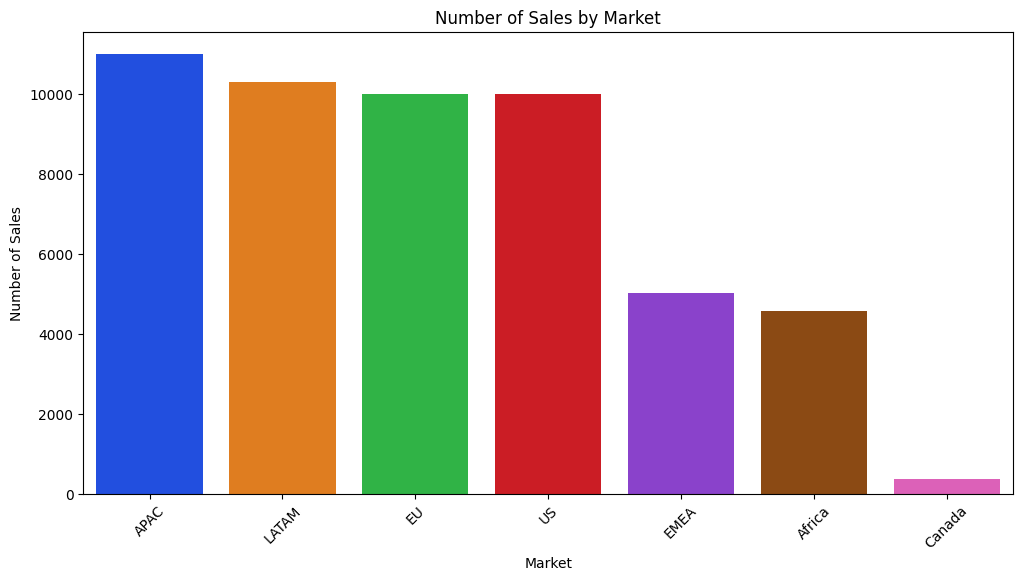

In [151]:
# Count the number of sales (or orders) for each market
sales_count_per_market = df['Market'].value_counts()

# Plot bar chart of sales by market
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_count_per_market.index, y=sales_count_per_market.values, palette='bright')
plt.title('Number of Sales by Market')
plt.xlabel('Market')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

##***Top 10 City with highest number of sales***
-number of sales per city

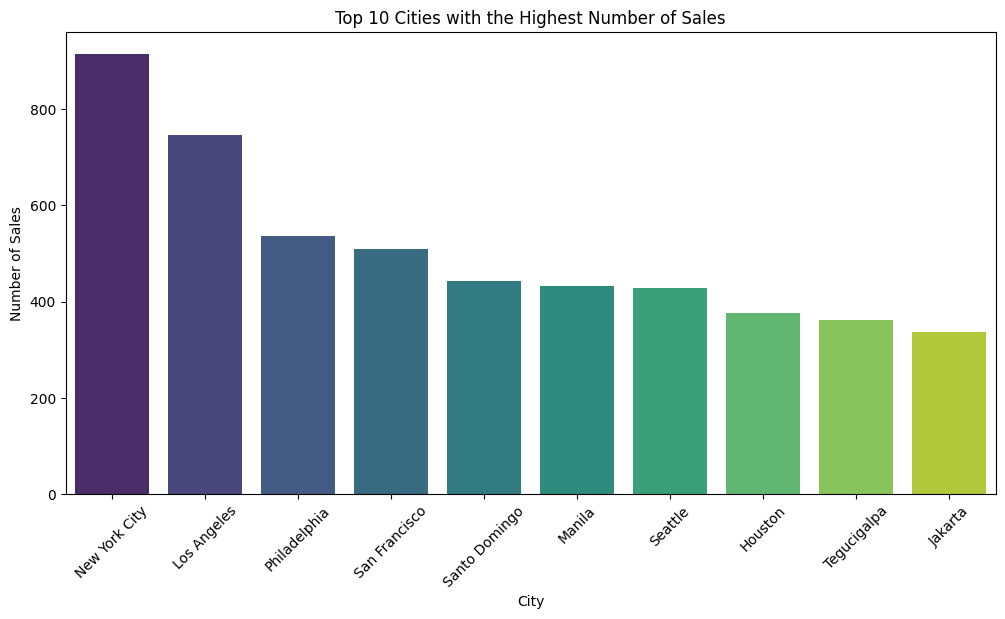

In [152]:
# Count the number of sales (or orders) for each city
sales_count_per_city = df['City'].value_counts()

# Get the top 10 cities with the highest number of sales
top_10_cities_sales = sales_count_per_city.head(10)

# Plot bar chart of the top 10 cities with the highest number of sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities_sales.index, y=top_10_cities_sales.values, palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Sales')
plt.xlabel('City')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

##***Top 10 city sale in term of total sale value not about number of sale***

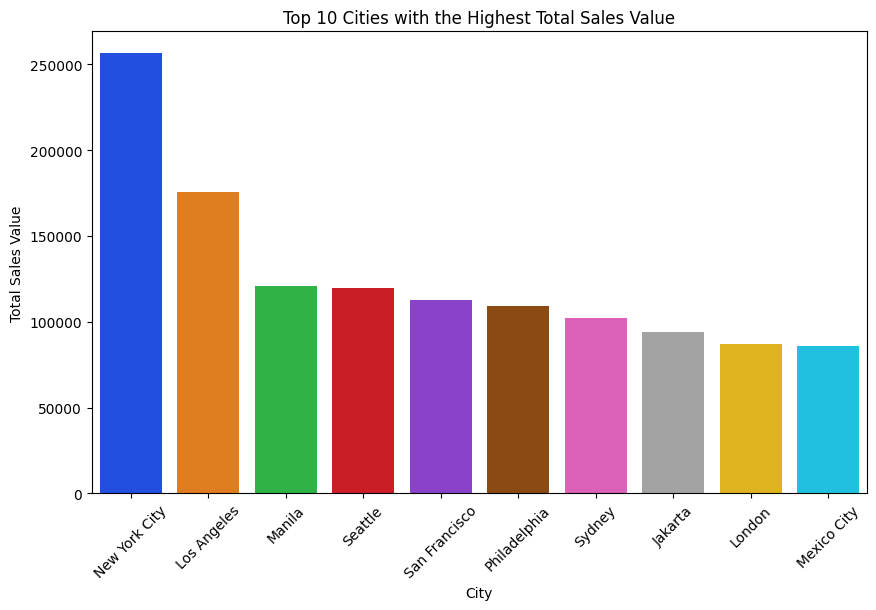

In [153]:
# Group by 'City' and sum the 'Sales' for each city
total_sales_per_city = df.groupby('City')['Sales'].sum()

# Sort the cities by total sales in descending order and get the top 10
top_10_cities_sales = total_sales_per_city.sort_values(ascending=False).head(10)

# Plot bar chart of the top 10 cities with the highest total sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities_sales.index, y=top_10_cities_sales.values, palette='bright')
plt.title('Top 10 Cities with the Highest Total Sales Value')
plt.xlabel('City')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

##***top 10 city with highest profit***

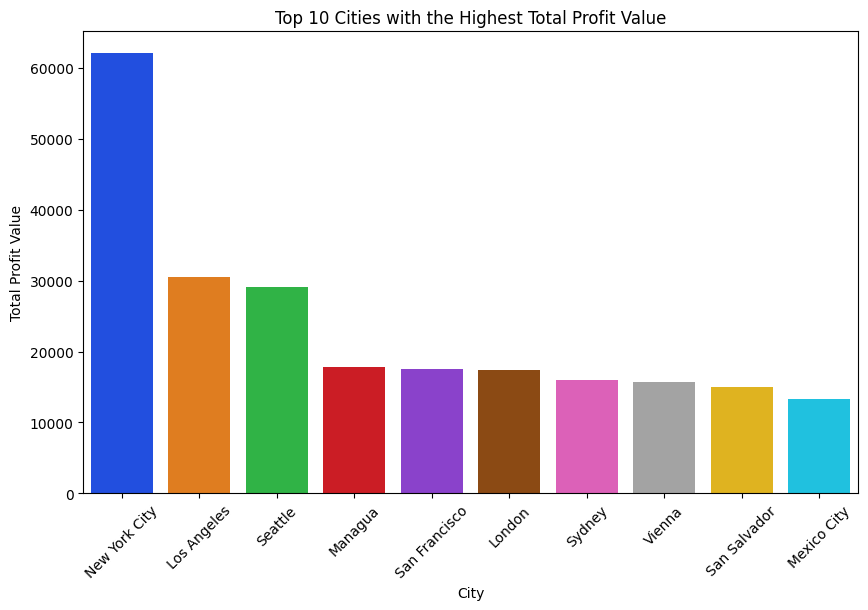

In [154]:
# Group by 'City' and sum the 'Profit' for each city
total_Profit_per_city = df.groupby('City')['Profit'].sum()

# Sort the cities by total Profit in descending order and get the top 10
top_10_cities_Profit = total_Profit_per_city.sort_values(ascending=False).head(10)

# Plot bar chart of the top 10 cities with the highest total Profit
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities_Profit.index, y=top_10_cities_Profit.values, palette='bright')
plt.title('Top 10 Cities with the Highest Total Profit Value')
plt.xlabel('City')
plt.ylabel('Total Profit Value')
plt.xticks(rotation=45)
plt.show()

##***Top 10 states by Sales***

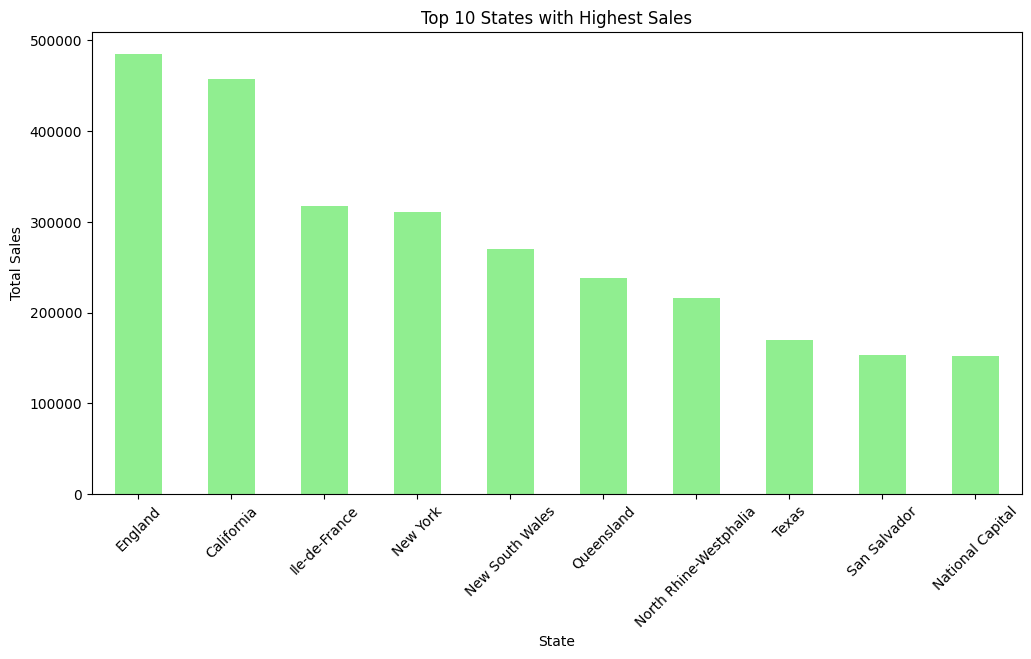

In [169]:
# Group by State and sum sales
state_sales = df.groupby('State')['Sales'].sum()

# Get the top 10 states with the highests sales
top_10_states = state_sales.nlargest(10)

# Plotting the top 10 states
plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar', color='lightgreen')
plt.title('Top 10 States with Highest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

##CONCLUSION:-
-The sales analysis provides valuable insights that can inform strategic decisions aimed at enhancing sales performance and driving business growth. Implementing these insights can position the company to capitalize on market opportunities effectively.\
-Feel free to adjust specific sections based on your actual findings and data! If you need more tailored content, just let me know!